# Data Quality Assesment

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [63]:
# reading data into four df
transactions =   pd.read_excel('/home/jasp/sem_3/kpmg/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions', skiprows=[0])
newCustomerList =   pd.read_excel('/home/jasp/sem_3/kpmg/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList', skiprows=[0])
customerDemographic =   pd.read_excel('/home/jasp/sem_3/kpmg/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic', skiprows=[0])
customerAddress =   pd.read_excel('/home/jasp/sem_3/kpmg/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress', skiprows=[0])

## Quality Assesment of Transactions 

In [4]:
# Quality Assesment of Transactions

transactions.shape

(20000, 13)

In [12]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [15]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [36]:
transactions.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

### Transaction ID

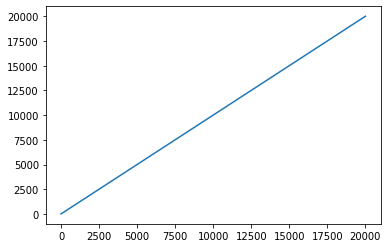

In [31]:
plt.plot(transactions.transaction_id)

In [33]:
sum(transactions.transaction_id.duplicated())

0

### Product ID

A product id 0.

(array([3463., 1888., 1759., 2004., 1794., 1872., 1800., 1690., 1859.,
        1871.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

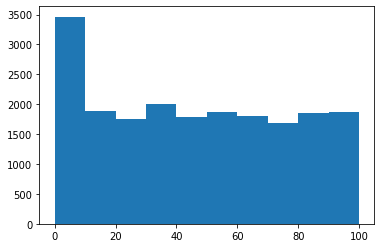

In [40]:
plt.hist(transactions.product_id)

In [3]:
transactions.product_id.value_counts()

0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64

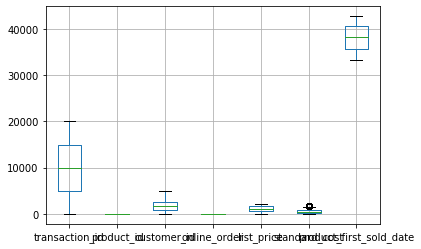

In [190]:
transactions.boxplot()

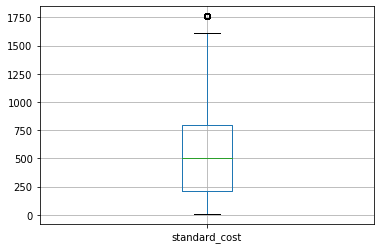

In [191]:
transactions.boxplot(column='standard_cost')

In [203]:
transactions.transaction_date.describe()

count                   20000
unique                    364
top       2017-02-14 00:00:00
freq                       82
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

(array([2029., 2015., 1980., 2024., 1878., 2008., 2058., 1968., 2040.,
        2000.]),
 array([736330. , 736366.3, 736402.6, 736438.9, 736475.2, 736511.5,
        736547.8, 736584.1, 736620.4, 736656.7, 736693. ]),
 <a list of 10 Patch objects>)

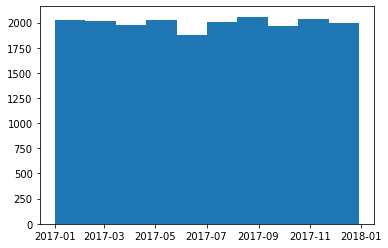

In [248]:
plt.hist(transactions.transaction_date)

In [205]:
transactions.order_status.describe()

count        20000
unique           2
top       Approved
freq         19821
Name: order_status, dtype: object

In [249]:
transactions.online_order.value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [267]:
datetime.fromordinal(41701)

datetime.datetime(115, 3, 5, 0, 0)

In [289]:
datetime.fromtimestamp(transactions.product_first_sold_date).date()

TypeError: cannot convert the series to <class 'int'>

(array([2782., 1176., 1381., 1579., 2309., 2446., 1007., 2579., 1873.,
        2671.]),
 array([719163.0516088 , 719163.06254745, 719163.07348611, 719163.08442477,
        719163.09536343, 719163.10630208, 719163.11724074, 719163.1281794 ,
        719163.13911806, 719163.15005671, 719163.16099537]),
 <a list of 10 Patch objects>)

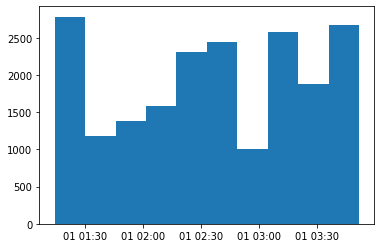

In [291]:
plt.hist(transactions.product_first_sold_date.dropna().astype(int).map(datetime.fromtimestamp))

In [142]:
# Making a function to check for below items 
# null values 
# dublication

def check_for_null_and_dublicated_values(data_frame):
    ''' input = data frame and output = columns with null and dublicated values'''
    columns = list(data_frame)
    for col in columns:
        if sum(pd.isnull(data_frame[col])) >0 :
            print(color.RED + "Null Value Counts in " + col + " is "+color.END +color.BOLD+ str(sum(pd.isnull(data_frame[col]))) +color.END)
        if sum(data_frame[col].duplicated()) > 0 :
            print(color.BLUE + "Dublicate Value Counts in " + col + " is "+color.END + color.BOLD+ str(sum(data_frame[col].duplicated())) +color.END)
        
        

In [141]:
check_for_null_and_dublicated_values(transactions)

Dublicate Value Counts in product_id is 19899
Dublicate Value Counts in customer_id is 16506
Dublicate Value Counts in transaction_date is 19636
Null Value Counts in online_order is 360
Dublicate Value Counts in online_order is 19997
Dublicate Value Counts in order_status is 19998
Null Value Counts in brand is 197
Dublicate Value Counts in brand is 19993
Null Value Counts in product_line is 197
Dublicate Value Counts in product_line is 19995
Null Value Counts in product_class is 197
Dublicate Value Counts in product_class is 19996
Null Value Counts in product_size is 197
Dublicate Value Counts in product_size is 19996
Dublicate Value Counts in list_price is 19704
Null Value Counts in standard_cost is 197
Dublicate Value Counts in standard_cost is 19896
Null Value Counts in product_first_sold_date is 197
Dublicate Value Counts in product_first_sold_date is 19899


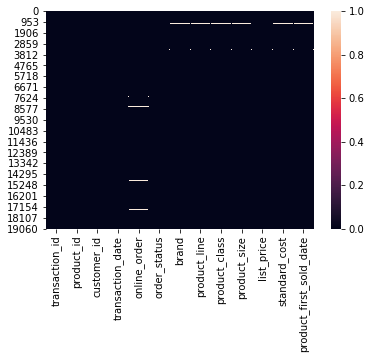

In [146]:
# visualize trend in null values 
sns.heatmap(transactions.isnull())

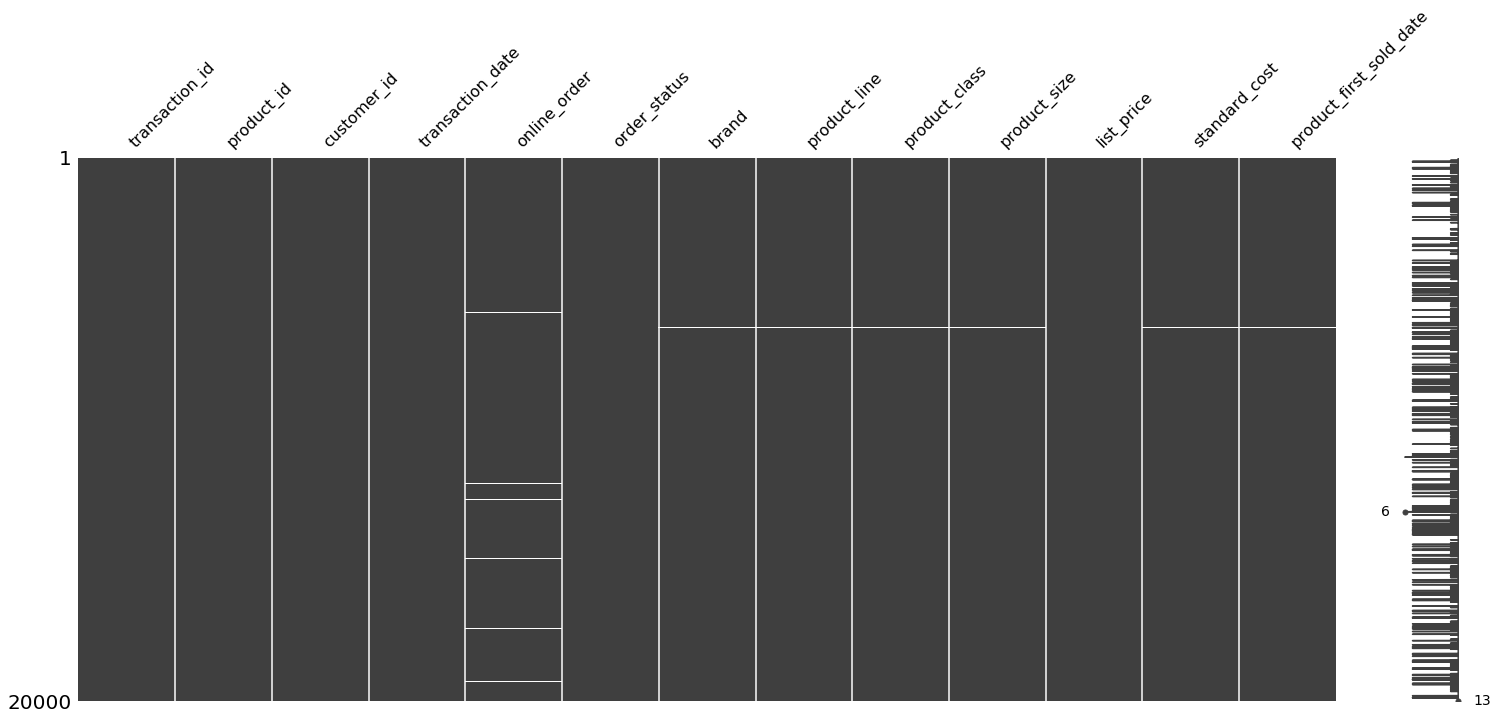

In [148]:
msno.matrix(transactions)

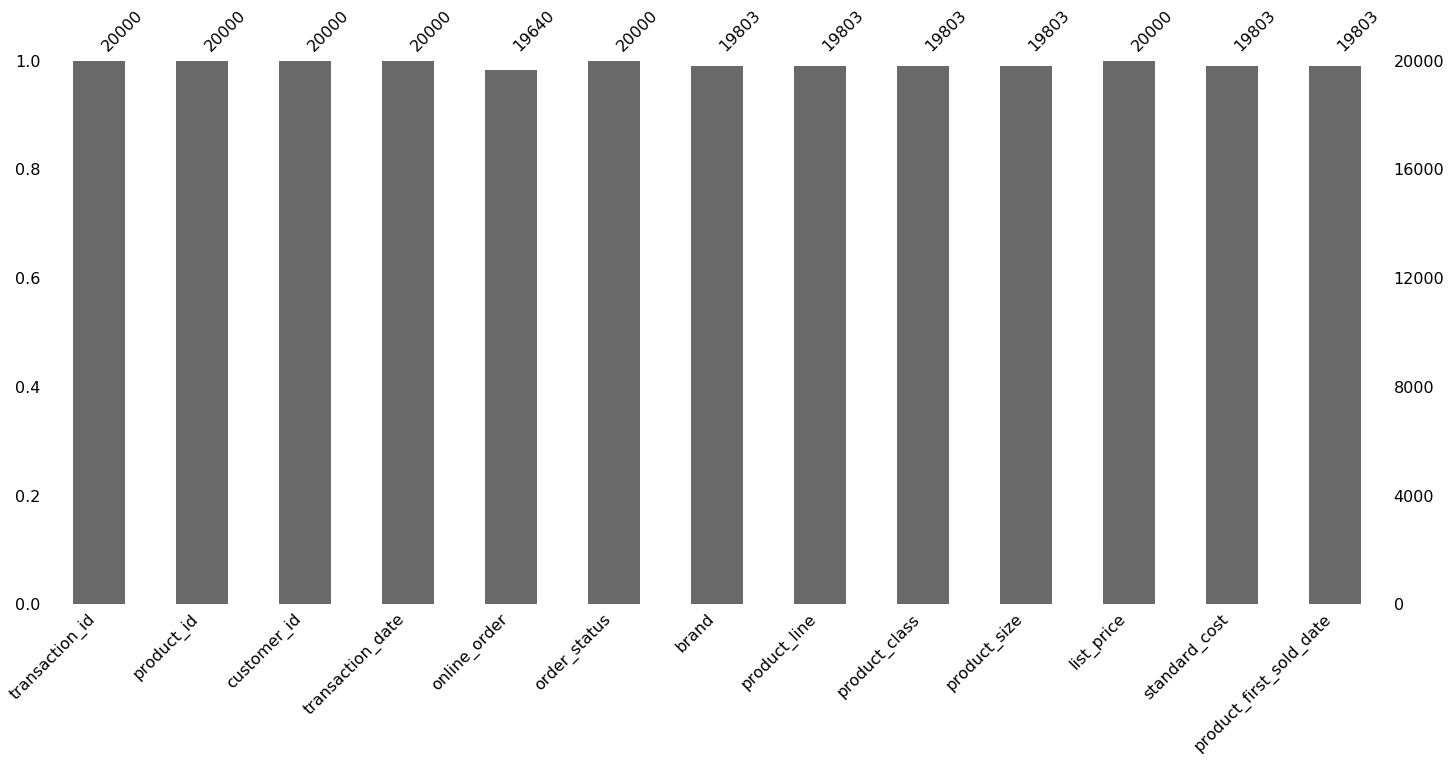

In [149]:
msno.bar(transactions)

In [16]:
transactions.product_first_sold_date

0        41245.0
1        41701.0
2        36361.0
3        36145.0
4        42226.0
          ...   
19995    37823.0
19996    35560.0
19997    40410.0
19998    38216.0
19999    36334.0
Name: product_first_sold_date, Length: 19445, dtype: float64

In [20]:
transactions.product_first_sold_date = transactions.product_first_sold_date.astype(int).map(datetime.fromordinal)

In [21]:
transactions.dropna(inplace=True)

In [23]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,0113-12-04 00:00:00
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,0115-03-05 00:00:00
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,0100-07-21 00:00:00
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,0099-12-17 00:00:00
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,0116-08-11 00:00:00


In [22]:
transactions.to_csv('transactions_cleaned.csv')

## Quality Assesment of New Customers List 

In [5]:
newCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [183]:
newCustomerList.drop(columns = ['Unnamed: 16','Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], inplace=True)

In [185]:
newCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [184]:
newCustomerList.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Rank                                            int64
Value                                         float64
dtype: object

(array([ 93.,  94.,  88.,  99., 110., 111., 122., 105.,  95.,  83.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

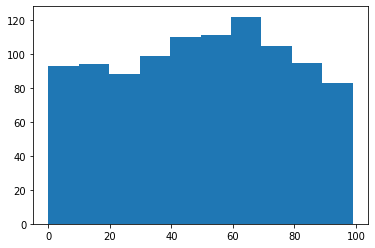

In [175]:
plt.hist(newCustomerList.past_3_years_bike_related_purchases)

In [207]:
newCustomerList.gender.unique()

array(['Male', 'Female', 'U'], dtype=object)

In [208]:
newCustomerList.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [210]:
newCustomerList.past_3_years_bike_related_purchases.describe()

count    1000.000000
mean       49.836000
std        27.796686
min         0.000000
25%        26.750000
50%        51.000000
75%        72.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe6d819a690>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe6d81a0090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe6d81909d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe6d81a0b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe6d81a8050>],
 'means': []}

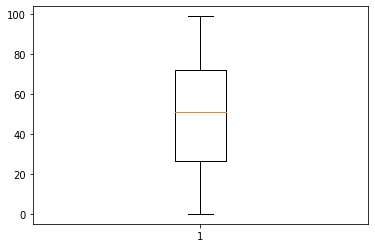

In [211]:
plt.boxplot(newCustomerList.past_3_years_bike_related_purchases)

In [213]:
newCustomerList.DOB.describe()

count                     983
unique                    958
top       1961-07-31 00:00:00
freq                        2
first     1938-06-08 00:00:00
last      2002-02-27 00:00:00
Name: DOB, dtype: object

(array([ 47.,  44.,  83.,  69.,  85., 101.,  96.,  41.,  74.,  75.]),
 array([707633. , 709956.4, 712279.8, 714603.2, 716926.6, 719250. ,
        721573.4, 723896.8, 726220.2, 728543.6, 730867. ]),
 <a list of 10 Patch objects>)

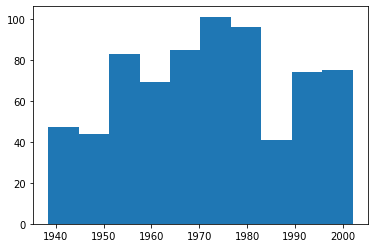

In [57]:
plt.hist(newCustomerList.DOB)

In [55]:
sum(newCustomerList.DOB < "1920-01-01")

0

In [39]:
newCustomerList[newCustomerList.DOB < "1943-01-01"]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
18,Odilia,Quick,Female,65,1938-11-09,General Manager,Manufacturing,Affluent Customer,N,Yes,...,NSW,Australia,11,0.53,0.6625,0.828125,0.828125,19,19,1.531250
62,Kaine,Smallcombe,Male,59,1942-02-06,Senior Financial Analyst,Financial Services,High Net Worth,N,No,...,NSW,Australia,10,0.48,0.4800,0.600000,0.600000,62,62,1.367969
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,...,NSW,Australia,12,0.84,0.8400,1.050000,1.050000,88,88,1.314844
102,Reynold,Elman,Male,19,1940-01-18,Marketing Manager,Manufacturing,Mass Customer,N,No,...,NSW,Australia,2,0.74,0.7400,0.740000,0.629000,102,102,1.288281
111,Jordan,Clampe,Male,37,1939-12-09,Staff Scientist,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,5,1.08,1.3500,1.350000,1.147500,111,111,1.281250
124,Ludvig,Andren,Male,44,1941-02-22,Media Manager III,NaN,High Net Worth,N,Yes,...,QLD,Australia,5,0.65,0.8125,0.812500,0.812500,125,125,1.261719
128,Georgetta,Lovett,Female,42,1940-02-02,Editor,Retail,Mass Customer,N,No,...,QLD,Australia,1,0.70,0.7000,0.700000,0.595000,127,127,1.250000
176,Devonne,Alderwick,Female,79,1939-01-29,Research Associate,NaN,High Net Worth,N,Yes,...,VIC,Australia,7,0.56,0.7000,0.700000,0.700000,177,177,1.162500
191,Franklin,Wohler,Male,55,1938-10-16,Clinical Specialist,Health,Mass Customer,N,Yes,...,NSW,Australia,8,0.91,1.1375,1.137500,0.966875,191,191,1.150000
200,Alfonso,Massel,Male,70,1940-12-05,NaN,NaN,Mass Customer,N,Yes,...,VIC,Australia,7,0.66,0.8250,0.825000,0.701250,201,201,1.142187


(array([ 25.,  62., 105., 115., 142., 203., 112., 108.,  70.,  58.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

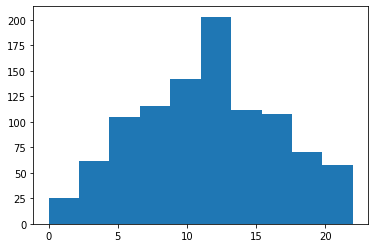

In [218]:
plt.hist(newCustomerList.tenure)

In [40]:
newCustomerList.tenure.describe()

count    1000.000000
mean       11.388000
std         5.037145
min         0.000000
25%         7.000000
50%        11.000000
75%        15.000000
max        22.000000
Name: tenure, dtype: float64

(array([ 25.,  62., 105., 115., 142., 203., 112., 108.,  70.,  58.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

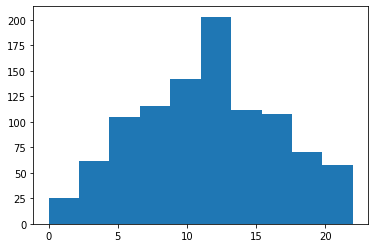

In [180]:
plt.hist(newCustomerList.tenure)

In [219]:
newCustomerList.postcode.describe()

count    1000.000000
mean     3019.227000
std       848.895767
min      2000.000000
25%      2209.000000
50%      2800.000000
75%      3845.500000
max      4879.000000
Name: postcode, dtype: float64

(array([325., 107.,  71., 105.,  94.,  14.,  67., 135.,  52.,  30.]),
 array([2000. , 2287.9, 2575.8, 2863.7, 3151.6, 3439.5, 3727.4, 4015.3,
        4303.2, 4591.1, 4879. ]),
 <a list of 10 Patch objects>)

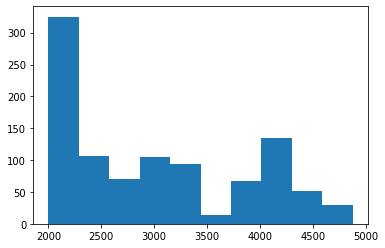

In [220]:
plt.hist(newCustomerList.postcode)

In [222]:
newCustomerList.property_valuation.describe()

count    1000.000000
mean        7.397000
std         2.758804
min         1.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        12.000000
Name: property_valuation, dtype: float64

(array([ 72.,  51.,  53.,  57.,  70., 138., 162., 173., 116., 108.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

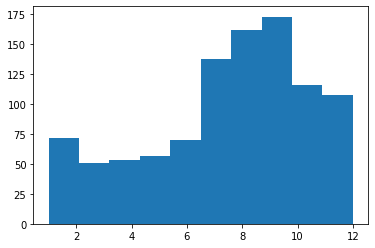

In [223]:
plt.hist(newCustomerList.property_valuation)

In [228]:
newCustomerList.Rank.describe()

count    1000.000000
mean      498.819000
std       288.810997
min         1.000000
25%       250.000000
50%       500.000000
75%       750.250000
max      1000.000000
Name: Rank, dtype: float64

In [229]:
newCustomerList.Rank.value_counts()

760     13
259     12
455      9
904      9
386      9
        ..
785      1
773      1
754      1
355      1
1000     1
Name: Rank, Length: 324, dtype: int64

(array([101.,  99., 101.,  99., 101., 100., 106.,  93., 102.,  98.]),
 array([   1. ,  100.9,  200.8,  300.7,  400.6,  500.5,  600.4,  700.3,
         800.2,  900.1, 1000. ]),
 <a list of 10 Patch objects>)

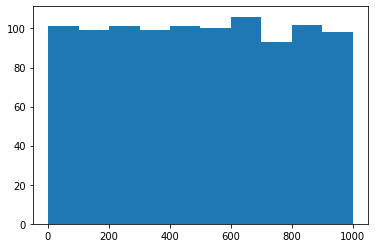

In [230]:
plt.hist(newCustomerList.Rank)

In [231]:
newCustomerList.Value.describe()

count    1000.000000
mean        0.881714
std         0.293525
min         0.340000
25%         0.649531
50%         0.860000
75%         1.075000
max         1.718750
Name: Value, dtype: float64

(array([ 65., 148., 168., 156., 160., 127.,  81.,  58.,  22.,  15.]),
 array([0.34    , 0.477875, 0.61575 , 0.753625, 0.8915  , 1.029375,
        1.16725 , 1.305125, 1.443   , 1.580875, 1.71875 ]),
 <a list of 10 Patch objects>)

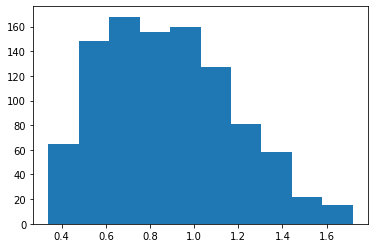

In [232]:
plt.hist(newCustomerList.Value)

In [154]:
check_for_null_and_dublicated_values(newCustomerList)

Dublicate Value Counts in first_name is 60
Null Value Counts in last_name is 29
Dublicate Value Counts in last_name is 38
Dublicate Value Counts in gender is 997
Dublicate Value Counts in past_3_years_bike_related_purchases is 900
Null Value Counts in DOB is 17
Dublicate Value Counts in DOB is 41
Null Value Counts in job_title is 106
Dublicate Value Counts in job_title is 815
Null Value Counts in job_industry_category is 165
Dublicate Value Counts in job_industry_category is 990
Dublicate Value Counts in wealth_segment is 997
Dublicate Value Counts in deceased_indicator is 999
Dublicate Value Counts in owns_car is 998
Dublicate Value Counts in tenure is 977
Dublicate Value Counts in postcode is 478
Dublicate Value Counts in state is 997
Dublicate Value Counts in country is 999
Dublicate Value Counts in property_valuation is 988
Dublicate Value Counts in Unnamed: 16 is 929
Dublicate Value Counts in Unnamed: 17 is 868
Dublicate Value Counts in Unnamed: 18 is 817
Dublicate Value Counts in

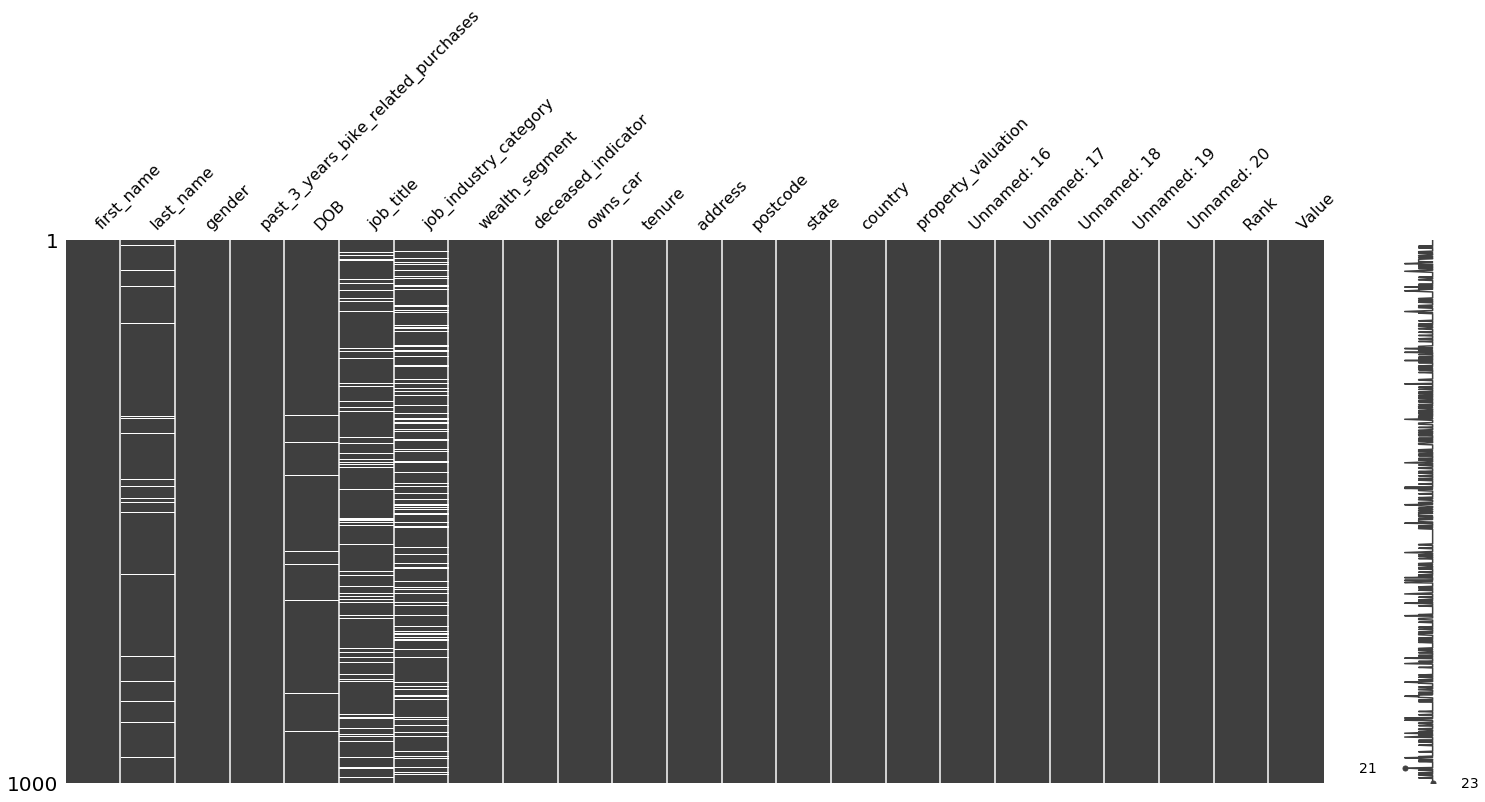

In [156]:
msno.matrix(newCustomerList)

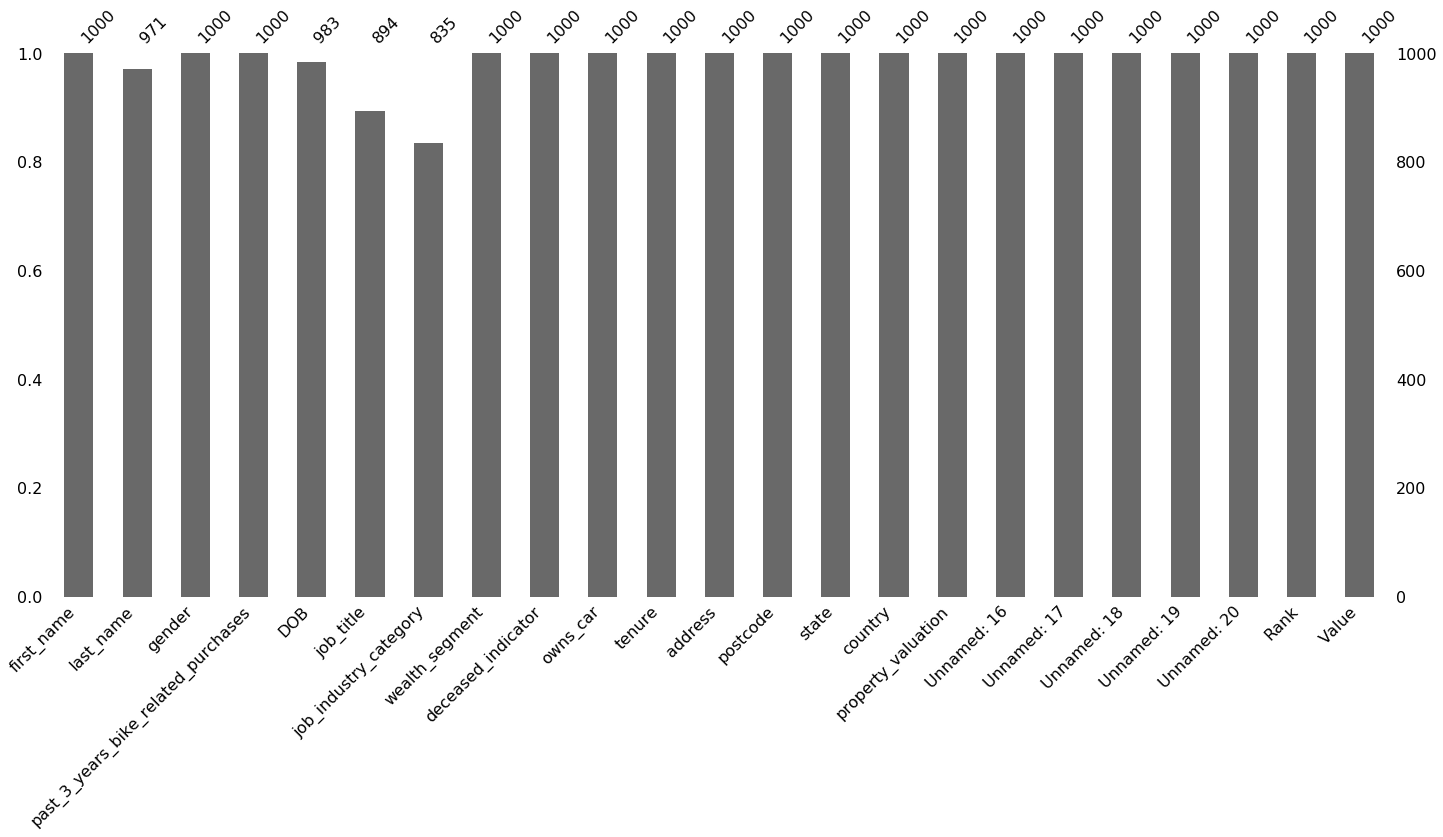

In [157]:
msno.bar(newCustomerList)

In [41]:
newCustomerList.dropna(inplace=True)

In [58]:
newCustomerList.to_csv('newCustomerList.csv')

## Quality Assesment of Customer Demographic

In [233]:
customerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [235]:
customerDemographic.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [237]:
customerDemographic.past_3_years_bike_related_purchases.describe()

count    4000.000000
mean       48.890000
std        28.715005
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

(array([370., 453., 407., 427., 399., 376., 402., 399., 376., 391.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

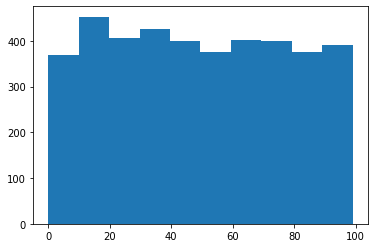

In [239]:
plt.hist(customerDemographic.past_3_years_bike_related_purchases)

(array([297., 339., 345., 334., 708., 602., 344., 309., 352., 277.]),
 array([713174. , 714948.6, 716723.2, 718497.8, 720272.4, 722047. ,
        723821.6, 725596.2, 727370.8, 729145.4, 730920. ]),
 <a list of 10 Patch objects>)

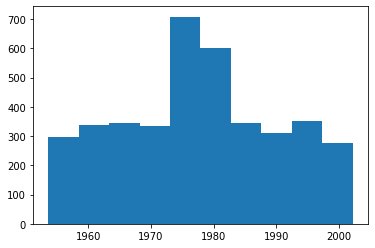

In [51]:
plt.hist(customerDemographic.DOB)

In [50]:
customerDemographic = customerDemographic[customerDemographic.DOB > "1950-01-01"]

In [241]:
customerDemographic.tenure.describe()

count    3913.000000
mean       10.657041
std         5.660146
min         1.000000
25%         6.000000
50%        11.000000
75%        15.000000
max        22.000000
Name: tenure, dtype: float64

/home/jasp/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jasp/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([476., 419., 427., 411., 439., 393., 379., 397., 367., 205.]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <a list of 10 Patch objects>)

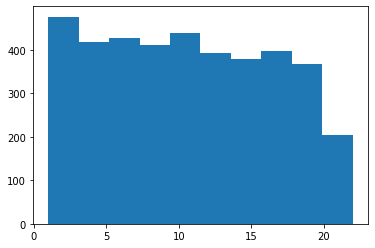

In [243]:
plt.hist(customerDemographic.tenure)

In [159]:
check_for_null_and_dublicated_values(customerDemographic)

Dublicate Value Counts in first_name is 861
Null Value Counts in last_name is 125
Dublicate Value Counts in last_name is 274
Dublicate Value Counts in gender is 3994
Dublicate Value Counts in past_3_years_bike_related_purchases is 3900
Null Value Counts in DOB is 87
Dublicate Value Counts in DOB is 551
Null Value Counts in job_title is 506
Dublicate Value Counts in job_title is 3804
Null Value Counts in job_industry_category is 656
Dublicate Value Counts in job_industry_category is 3990
Dublicate Value Counts in wealth_segment is 3997
Dublicate Value Counts in deceased_indicator is 3998
Null Value Counts in default is 302
Dublicate Value Counts in default is 3909
Dublicate Value Counts in owns_car is 3998
Null Value Counts in tenure is 87
Dublicate Value Counts in tenure is 3977


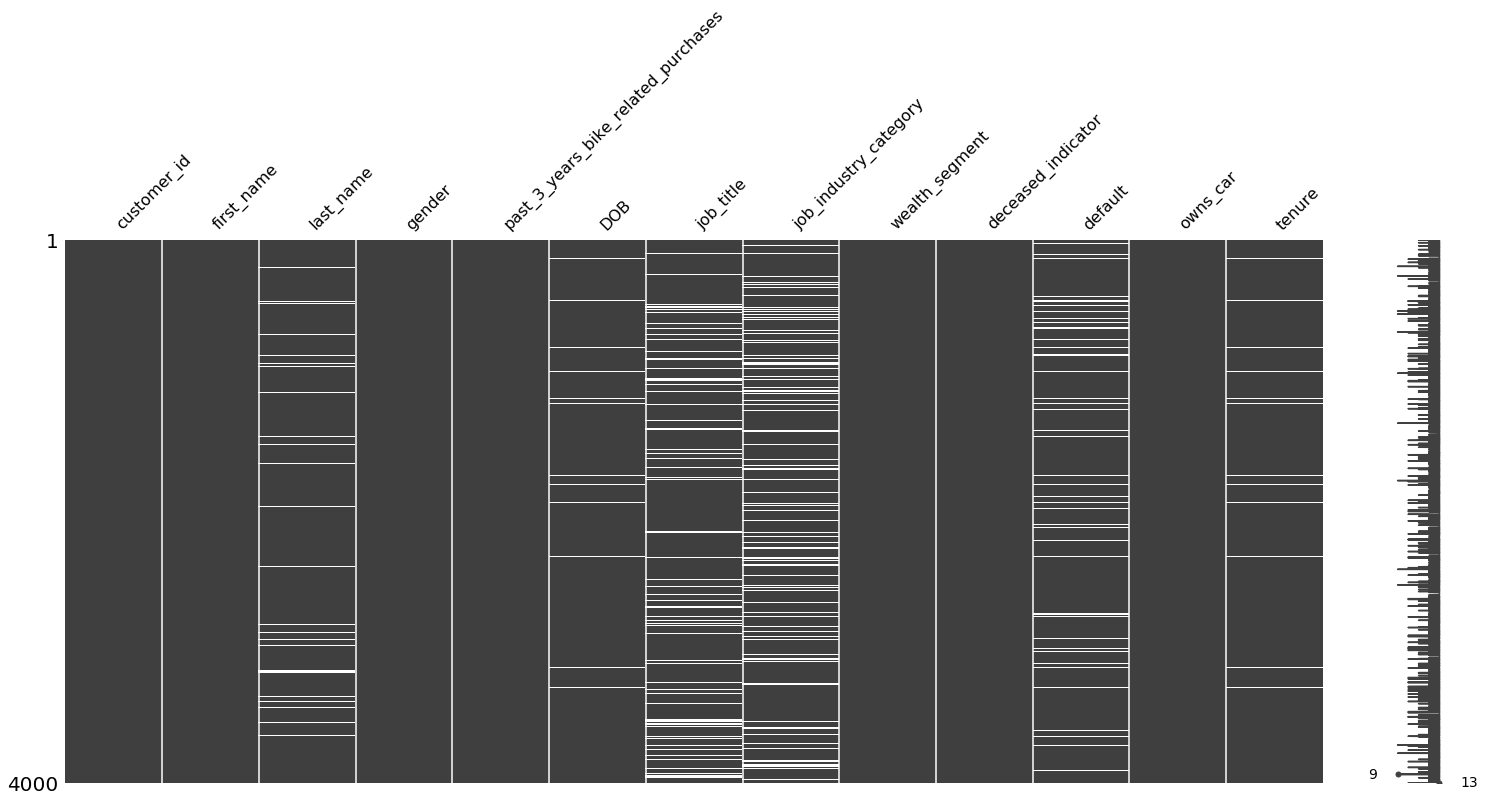

In [160]:
msno.matrix(customerDemographic)

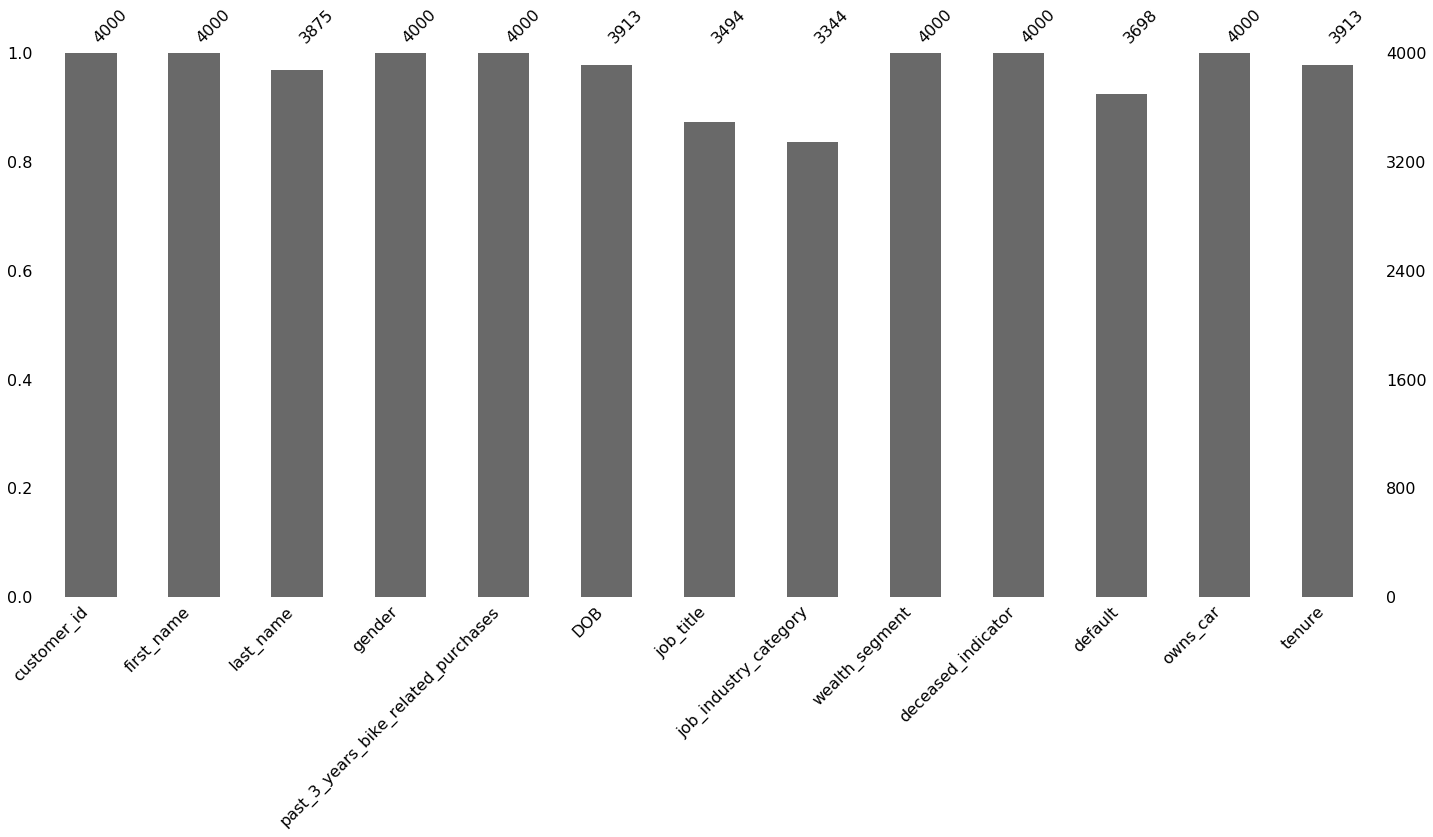

In [161]:
msno.bar(customerDemographic)

In [59]:
customerDemographic.dropna(inplace=True)

In [60]:
customerDemographic.to_csv('customerDemographic.csv')

## Quality Assesment of Customer Address

In [245]:
customerAddress.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [64]:
customerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [70]:
customerAddress.state.value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [67]:
maping = {'New South Wales': 'NSW',
          'Victoria' : 'VIC',
          'NSW':'NSW',
          'VIC':'VIC',
          'QLD':'QLD'
         }

In [69]:
customerAddress.state = customerAddress.state.map(maping)

In [13]:
customerAddress.state.value_counts()

NSW    86
VIC    82
Name: state, dtype: int64

(array([297., 186., 214., 225., 238., 493., 646., 647., 577., 476.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

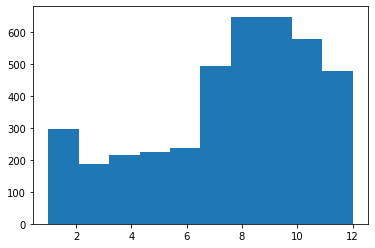

In [246]:
plt.hist(customerAddress.property_valuation)

In [247]:
customerAddress.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [162]:
check_for_null_and_dublicated_values(customerAddress)

Dublicate Value Counts in address is 3
Dublicate Value Counts in postcode is 3126
Dublicate Value Counts in state is 3994
Dublicate Value Counts in country is 3998
Dublicate Value Counts in property_valuation is 3987


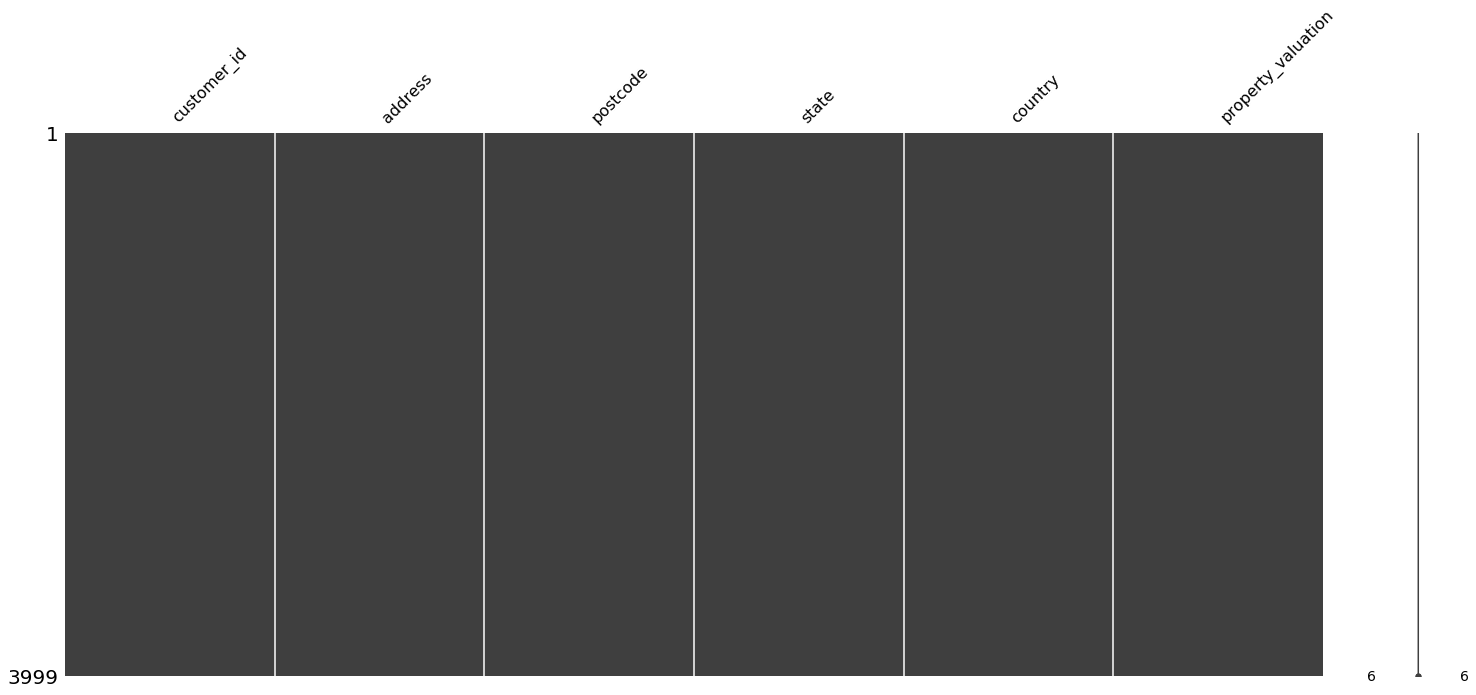

In [163]:
msno.matrix(customerAddress)

In [71]:
customerAddress.to_csv('customerAddress.csv')